In [1]:
# import packages that will be used for the logistics regression analysis
import pylab
import seaborn as sb
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.core.display import HTML
from IPython.display import display
import pandas as pd
from pandas import Series, DataFrame
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# import data set that will be used for the logistics regression analysis
pd.set_option('display.max_columns', None)
df = pd.read_csv (r'C:\Users\fahim\Documents\0_WGUDocuments\d208\1medical_clean.csv')

# rename the item columns accordingly
df.rename(columns={'Item1':'Timely_admis','Item2':'Timely_treat',
 'Item3':'Timely_visits','Item4':'Reliability',
 'Item5':'Options','Item6':'Hrs_treat',
 'Item7':'Courteous','Item8':'Active_listen'},inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [2]:
# drop all the demographic columns we don't need for this logistics regression analysis
df.drop(['City','State','County','Area','Zip','Lat','Lng','Population','TimeZone','Additional_charges','TotalCharge','Services','Interaction','UID','Customer_id','Job','CaseOrder'],axis = 1,inplace=True)
# verify that all the columns were dropped before proceeding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   Marital             10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   ReAdmis             10000 non-null  object 
 6   VitD_levels         10000 non-null  float64
 7   Doc_visits          10000 non-null  int64  
 8   Full_meals_eaten    10000 non-null  int64  
 9   vitD_supp           10000 non-null  int64  
 10  Soft_drink          10000 non-null  object 
 11  Initial_admin       10000 non-null  object 
 12  HighBlood           10000 non-null  object 
 13  Stroke              10000 non-null  object 
 14  Complication_risk   10000 non-null  object 
 15  Overweight          10000 non-null  object 
 16  Arthr

In [3]:
# convert categorical yes/no values to numeric 1/0 values
df = df.replace(to_replace = ['Yes','No'],value = [1,0])
df

,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,Timely_admis,Timely_treat,Timely_visits,Reliability,Options,Hrs_treat,Courteous,Active_listen
0,1,53,86575.93,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1,1,0,1,1,1,0,1,10.585770,3,3,2,2,4,3,3,4
1,3,51,46805.99,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0,0,0,0,0,0,1,0,15.129562,3,4,3,4,4,4,3,3
2,3,53,14370.14,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0,1,0,0,0,0,0,0,4.772177,2,4,4,4,3,4,3,3
3,0,78,39741.49,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1,0,0,0,0,0,1,1,1.714879,3,5,5,3,4,5,5,5
4,1,22,1209.56,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0,0,1,0,0,1,0,0,1.254807,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,25,45967.61,Widowed,Male,0,16.980860,4,2,1,0,Emergency Admission,1,0,Medium,0,0,0,0,0,1,0,1,0,51.561220,3,2,2,3,4,3,4,2
9996,4,87,14983.02,Widowed,Male,1,18.177020,5,0,0,0,Elective Admission,1,0,Medium,1,1,1,0,0,0,0,0,1,68.668240,3,3,4,2,5,3,4,4
9997,3,45,65917.81,Separated,Female,1,17.129070,4,2,0,1,Elective Admission,1,0,High,1,0,0,0,0,1,1,0,0,70.154180,3,3,3,4,4,2,3,2
9998,3,43,29702.32,Divorced,Male,1,19.910430,5,2,1,0,Emergency Admission,0,0,Medium,1,0,0,0,1,0,0,0,0,63.356900,5,5,3,4,4,3,4,3


In [4]:
# convert the categorical variable values of gender, initial admissions, and complication risk to numeric values
df['Gender'] = df['Gender'].replace(['Male','Female','Nonbinary'],[1,2,3])
df['Initial_admin'] = df['Initial_admin'].replace(['Emergency Admission','Elective Admission','Observation Admission'],[1,2,3])
df['Complication_risk'] =df['Complication_risk'].replace(['High','Medium', 'Low'],[1,2,3])
df

,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,Timely_admis,Timely_treat,Timely_visits,Reliability,Options,Hrs_treat,Courteous,Active_listen
0,1,53,86575.93,Divorced,1,0,19.141466,6,0,0,0,1,1,0,2,0,1,1,0,1,1,1,0,1,10.585770,3,3,2,2,4,3,3,4
1,3,51,46805.99,Married,2,0,18.940352,4,2,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,15.129562,3,4,3,4,4,4,3,3
2,3,53,14370.14,Widowed,2,0,18.057507,4,1,0,0,2,1,0,2,1,0,1,0,0,0,0,0,0,4.772177,2,4,4,4,3,4,3,3
3,0,78,39741.49,Married,1,0,16.576858,4,1,0,0,2,0,1,2,0,1,0,0,0,0,0,1,1,1.714879,3,5,5,3,4,5,5,5
4,1,22,1209.56,Widowed,2,0,17.439069,5,0,2,1,2,0,0,3,0,0,0,1,0,0,1,0,0,1.254807,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,25,45967.61,Widowed,1,0,16.980860,4,2,1,0,1,1,0,2,0,0,0,0,0,1,0,1,0,51.561220,3,2,2,3,4,3,4,2
9996,4,87,14983.02,Widowed,1,1,18.177020,5,0,0,0,2,1,0,2,1,1,1,0,0,0,0,0,1,68.668240,3,3,4,2,5,3,4,4
9997,3,45,65917.81,Separated,2,1,17.129070,4,2,0,1,2,1,0,1,1,0,0,0,0,1,1,0,0,70.154180,3,3,3,4,4,2,3,2
9998,3,43,29702.32,Divorced,1,1,19.910430,5,2,1,0,1,0,0,2,1,0,0,0,1,0,0,0,0,63.356900,5,5,3,4,4,3,4,3


In [5]:
# convert the non-married Marital status values to "Married/Not Married", then convert "Married/Not Married" to "1/0"
#this will make the Marital variable easier to work with during regression analysis
df['Marital'] = df['Marital'].replace(['Divorced','Widowed','Separated','Never Married'],'Not Married')
df['Marital'] = df['Marital'].replace(['Married','Not Married'],[1,0])
df

,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,Timely_admis,Timely_treat,Timely_visits,Reliability,Options,Hrs_treat,Courteous,Active_listen
0,1,53,86575.93,0,1,0,19.141466,6,0,0,0,1,1,0,2,0,1,1,0,1,1,1,0,1,10.585770,3,3,2,2,4,3,3,4
1,3,51,46805.99,1,2,0,18.940352,4,2,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,15.129562,3,4,3,4,4,4,3,3
2,3,53,14370.14,0,2,0,18.057507,4,1,0,0,2,1,0,2,1,0,1,0,0,0,0,0,0,4.772177,2,4,4,4,3,4,3,3
3,0,78,39741.49,1,1,0,16.576858,4,1,0,0,2,0,1,2,0,1,0,0,0,0,0,1,1,1.714879,3,5,5,3,4,5,5,5
4,1,22,1209.56,0,2,0,17.439069,5,0,2,1,2,0,0,3,0,0,0,1,0,0,1,0,0,1.254807,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,25,45967.61,0,1,0,16.980860,4,2,1,0,1,1,0,2,0,0,0,0,0,1,0,1,0,51.561220,3,2,2,3,4,3,4,2
9996,4,87,14983.02,0,1,1,18.177020,5,0,0,0,2,1,0,2,1,1,1,0,0,0,0,0,1,68.668240,3,3,4,2,5,3,4,4
9997,3,45,65917.81,0,2,1,17.129070,4,2,0,1,2,1,0,1,1,0,0,0,0,1,1,0,0,70.154180,3,3,3,4,4,2,3,2
9998,3,43,29702.32,0,1,1,19.910430,5,2,1,0,1,0,0,2,1,0,0,0,1,0,0,0,0,63.356900,5,5,3,4,4,3,4,3


0    6331
1    3669
Name: ReAdmis, dtype: int64


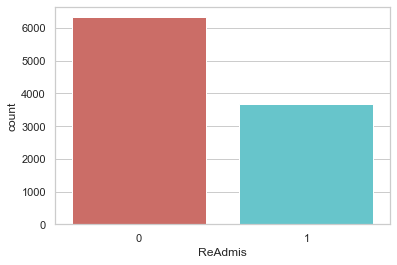

In [6]:
# Start to visuallize the data, including univariate and bivariate analyses
print(df['ReAdmis'].value_counts())
sb.countplot(x='ReAdmis', data=df, palette='hls')
plt.show()

In [7]:
# create the initial logistics model
df['Intercept'] = 1
log_reg_results = sm.Logit(df["ReAdmis"], df[['Children',
 'Age',
 'Income',
 'Marital',
 'Gender',
 'VitD_levels',
 'Doc_visits',
 'Full_meals_eaten',
 'vitD_supp',
 'Soft_drink',
 'Initial_admin',
 'HighBlood',
 'Stroke',
 'Complication_risk',
 'Overweight',
 'Arthritis',
 'Diabetes',
 'Hyperlipidemia',
 'BackPain',
 'Anxiety',
 'Allergic_rhinitis',
 'Reflux_esophagitis',
 'Asthma',
 'Initial_days',
 'Timely_admis',
 'Timely_treat',
 'Timely_visits',
 'Reliability',
 'Options',
 'Hrs_treat',
 'Courteous',
 'Active_listen']]).fit()

Optimization terminated successfully.
         Current function value: 0.098072
         Iterations 11


In [8]:
print(log_reg_results.summary())

                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9968
Method:                           MLE   Df Model:                           31
Date:                Fri, 23 Dec 2022   Pseudo R-squ.:                  0.8508
Time:                        17:09:41   Log-Likelihood:                -980.72
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Children               0.0068      0.026      0.257      0.797      -0.045       0.058
Age                   -0.0130      0.003     -4.556      0.000      -0.019      -0.007
Income             -

In [9]:
# create the correlation matrix
matrix_df = pd.read_csv(r'C:\Users\fahim\Documents\0_WGUDocuments\d208\d208_task2_datadec22run1.csv')

matrix_df = matrix_df[['Children',
 'Age',
 'Income',
 'Marital',
 'Gender',
 'VitD_levels',
 'Doc_visits',
 'Full_meals_eaten',
 'vitD_supp',
 'Soft_drink',
 'Initial_admin',
 'HighBlood',
 'Stroke',
 'Complication_risk',
 'Overweight',
 'Arthritis',
 'Diabetes',
 'Hyperlipidemia',
 'BackPain',
 'Anxiety',
 'Allergic_rhinitis',
 'Reflux_esophagitis',
 'Asthma',
 'Initial_days',
 'Timely_admis',
 'Timely_treat',
 'Timely_visits',
 'Reliability',
 'Options',
 'Hrs_treat',
 'Courteous',
 'Active_listen','ReAdmis' ]]

X = matrix_df.iloc[:, 1:-1].values
y = matrix_df.iloc[:,-1].values

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty = 'elasticnet', l1_ratio = 0.5, solver ='saga')
classifier.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [32]:
y_pred = classifier.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[1291    0]
 [ 709    0]]


<AxesSubplot:>

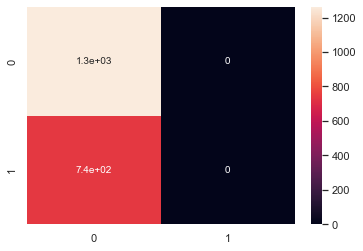

In [14]:
y_predict_test = classifier.predict(X_test)
new_matrix = confusion_matrix(y_test, y_predict_test)
sb.heatmap(new_matrix, annot=True)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77      1262
           1       0.00      0.00      0.00       738

    accuracy                           0.63      2000
   macro avg       0.32      0.50      0.39      2000
weighted avg       0.40      0.63      0.49      2000



C:\Users\fahim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fahim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fahim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [25]:
# create the reduced logistics model ***CODE MODIFICATION two and three: predict accuracy of matrix
df['Intercept'] = 1
log_reg_results2 = sm.Logit(df["ReAdmis"], df[['Children','Marital','Full_meals_eaten','Soft_drink','HighBlood','Diabetes','Hyperlipidemia','BackPain', 'Timely_admis','Timely_treat']]).fit()
print(log_reg_results2.summary())

Optimization terminated successfully.
         Current function value: 0.658251
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Fri, 23 Dec 2022   Pseudo R-squ.:               -0.001470
Time:                        17:26:05   Log-Likelihood:                -6582.5
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Children             0.0108      0.009      1.156      0.248      -0.008       0.029
Marital    

In [17]:
# create the correlation for the reduced model matrix
matrix_df = pd.read_csv(r'C:\Users\fahim\Documents\0_WGUDocuments\d208\d208_task2_datadec22run1.csv')

matrix_df = matrix_df[['Children','Marital','Full_meals_eaten','Soft_drink','HighBlood','Diabetes','Hyperlipidemia','BackPain', 'Timely_admis','Timely_treat','Intercept','ReAdmis' ]]

X = matrix_df.iloc[:, 1:-1].values
y = matrix_df.iloc[:,-1].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty = 'elasticnet', l1_ratio = 0.5, solver ='saga')
classifier.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [28]:
y_pred = classifier.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[1262    0]
 [ 738    0]]


In [ ]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))